In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define constants
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 30

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load and prepare the training and validation data
train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\MAHFOOZ ALAM\\Desktop\\ONLY TRIAL PROJECTS\\Brain tumor detection app\\Training",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=['glioma', 'meningioma', 'notumor', 'pituitary'],
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    "C:\\Users\\MAHFOOZ ALAM\\Desktop\\ONLY TRIAL PROJECTS\\Brain tumor detection app\\Training",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=['glioma', 'meningioma', 'notumor', 'pituitary'],
    subset='validation'
)

# Load and prepare the testing data
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\MAHFOOZ ALAM\\Desktop\\ONLY TRIAL PROJECTS\\Brain tumor detection app\\Testing",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=['glioma', 'meningioma', 'notumor', 'pituitary']
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [12]:
# Build the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

C:\Users\MAHFOOZ ALAM\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add reduce learning rate on plateau with adjusted parameters
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

In [14]:
# Train the model - now it will run for full 30 epochs
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[reduce_lr]
)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 76s 499ms/step - accuracy: 0.5547 - loss: 1.5510 - val_accuracy: 0.2585 - val_loss: 3.4579 - learning_rate: 0.0010
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 470ms/step - accuracy: 0.7003 - loss: 0.7902 - val_accuracy: 0.3392 - val_loss: 1.9381 - learning_rate: 0.0010
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 469ms/step - accuracy: 0.7315 - loss: 0.7311 - val_accuracy: 0.5232 - val_loss: 1.2751 - learning_rate: 0.0010
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 470ms/step - accuracy: 0.7702 - loss: 0.5845 - val_accuracy: 0.4899 - val_loss: 1.8140 - learning_rate: 0.0010
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 469ms/step - accuracy: 0.8067 - loss: 0.5084 - val_accuracy: 0.4549 - val_loss: 1.5907 - learning_rate: 0.0010
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 468ms/step - accuracy: 0.8128 - loss: 0.4802 - val_accuracy: 0.3576 - val_loss: 4.0208 - learning_rate: 0.0010
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.83

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.7644 - loss: 0.9631

Test accuracy: 0.7696


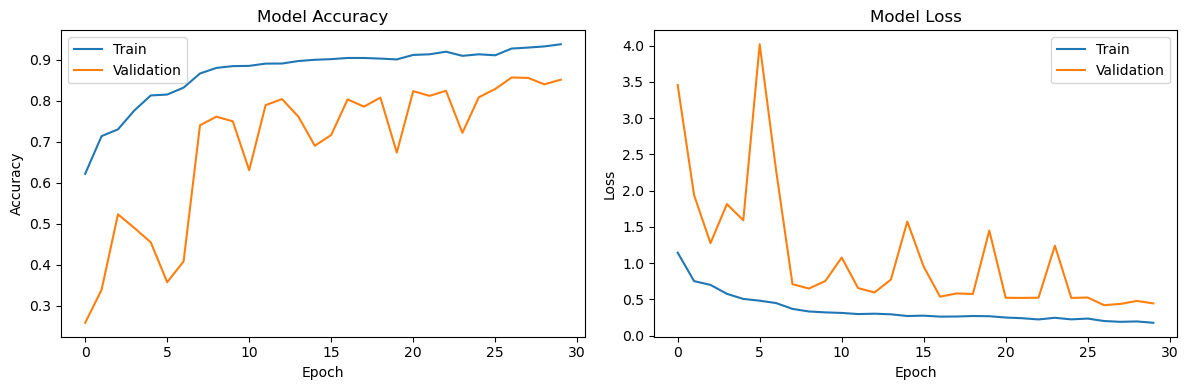

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

# Display training history
plot_training_history(history)

In [16]:
# Function to make predictions on new images
def predict_tumor(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.
    
    prediction = model.predict(img_array)
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    return predicted_class, confidence

In [17]:
# Save the model
model.save('brain_tumor_model.h5')